In [1]:
import pandas as pd    
import numpy as np
import matplotlib as plt

In [2]:
df = pd.read_csv("Exasens.csv").iloc[2:, [0, 6, 7, 8]]

# print(df.info())
# print(df.to_string())

df.dropna(inplace=True)
df = df.astype({"Diagnosis":"category","Gender":"int64", "Age":"int64", "Smoking":"int64"}).astype({"Gender":"category","Smoking":"category"})

# print(df.info())
# print(df.to_string())

df["Age"] = pd.cut(df["Age"], bins=[0, 40, 60, 100], include_lowest=True, labels=["Young", "Middle-aged", "Old"])

#print(df.info())
print(df.to_string())


    Diagnosis Gender          Age Smoking
2        COPD      1          Old       2
3        COPD      0          Old       2
4        COPD      1          Old       3
5        COPD      1          Old       2
6        COPD      0          Old       2
7        COPD      1  Middle-aged       2
8        COPD      1          Old       2
9        COPD      1          Old       2
10       COPD      1          Old       2
11       COPD      1          Old       2
12       COPD      1          Old       2
13       COPD      1          Old       2
14       COPD      0  Middle-aged       2
15       COPD      1          Old       2
16       COPD      0          Old       2
17       COPD      1  Middle-aged       2
18       COPD      1          Old       2
19       COPD      1          Old       2
20       COPD      1          Old       2
21       COPD      1          Old       2
22       COPD      1          Old       2
23       COPD      1          Old       2
24       COPD      1          Old 

In [3]:
from sklearn.preprocessing import LabelEncoder

X = df.iloc[:,1:].values
Y = df.iloc[:,0].values

# print(X)

le = LabelEncoder()
X[:,1] = le.fit_transform(X[:,1])

# print(X)

# age_encoded = pd.Series(le.fit_transform(data["Age"]).tolist())
# diagnosis_encoded = pd.Series(le.fit_transform(data["Diagnosis"]).tolist())
# gender_encoded = pd.Series(le.fit_transform(data["Gender"]).tolist())
# smoking_encoded = pd.Series(le.fit_transform(data["Smoking"]).tolist())

# features = []
# for i in range(0, len(data.index)):
#    tmparr = []
#    tmparr.extend([age_encoded[i], gender_encoded[i], smoking_encoded[i]])
#    features.append(tmparr)

# print(features)


In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=0)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)



In [5]:
# features=zip(gender_encoded, age_encoded, smoking_encoded)

from sklearn.naive_bayes import GaussianNB

model = GaussianNB()

# model.fit(features, diagnosis_encoded)
model.fit(X_train, Y_train)

Y_pred = model.predict(X_test)

# predict = model.predict ([[0, 1, 2]]) # From [Age, Gender, Smoking], predict Diagnosis
# Age = [0 = Young (X<40), 1 = Middle Aged (40<X<60), 2 = Old (X>60)]
# Gender = [0 = Female, 1 = Male]
# Smoking = [0 = Non-smoker, 1 = Ex-smoker, 2 = Active smoker]
# print(f"Predicted Value: {predict}")
# Diagnosis = [0 = Asthma, 1 = COPD, 2 = HC, 3 = Infected]



In [6]:
Y_pred
pd.DataFrame(Y_pred, columns=["Y_pred"])

,Y_pred
0,HC
1,HC
2,HC
3,HC
4,HC
...,...
75,HC
76,HC
77,COPD
78,HC


In [7]:
Y_test
pd.DataFrame(Y_test, columns=["Y_test"])

,Y_test
0,HC
1,Asthma
2,Infected
3,HC
4,Asthma
...,...
75,COPD
76,Infected
77,Asthma
78,Infected


In [8]:
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay
cm = confusion_matrix(Y_test, Y_pred)
ac = accuracy_score(Y_test, Y_pred)

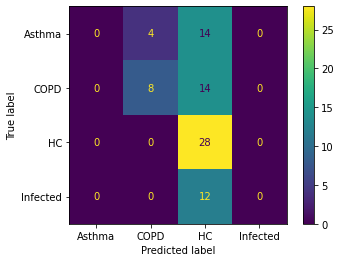

In [9]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()

In [10]:
ac

0.45

In [11]:
# print(diagnosis_encoded.to_string())